In [56]:
import os
import os
import re
import sys
import pandas as pd
#netflow = '../../data/netflow_day-02.hdf5'
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks",color_codes=True)

In [34]:
import arkouda as ak
ak.connect(server='localhost',port='5555')

In [35]:
#ak.shutdown()
#print(sys.path)

ZMQError: Operation cannot be accomplished in current state

In [38]:
#testfile = open('../ak.log')
#txt = testfile.read()
#print(txt)
with open('../ak.log') as log:
    line = log.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt,line.strip()))
        #print("{}: {}".format(cnt,line.strip()))
        line = log.readline()
        cnt += 1
        if "<<<" in line:
            #print(line.split()[1])
            with open('functions.csv','a') as fcn:
                function = line.split()[1]
                seconds = line.split()[3]
                if seconds.endswith('sec'):
                    seconds = seconds[:-3]
                fcn.write(function + ',' + seconds +'\n')

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
d = pd.read_csv("functions.csv")
log = pd.DataFrame(data=d)
log.columns = ['function','seconds']
#log
sns.set(style="whitegrid")
#df.plot()
#f = open('../ak.log','r')
#file_contents = f.read()
#print(file_contents)
#f.close()

In [81]:
logm = log * [,100000]
logm.columns = ['function','Milliseconds']

SyntaxError: invalid syntax (<ipython-input-81-595a6749a71d>, line 1)

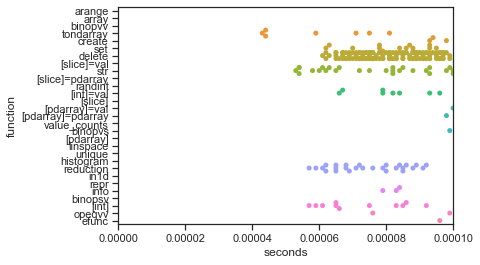

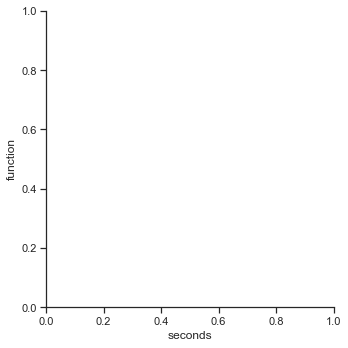

In [80]:
#dim10by8 = (10, 8)
#fig, ax = plt.subplots(figsize=dim10by8);
#fs = sns.catplot(x="seconds",y="function",kind="swarm", hue = "seconds", ax=ax, data=log)
#fs = sns.catplot(x="seconds",y="function",kind="swarm", ax=ax, data=log)
axes = plt.gca()
axes.set_xlim([0,0.0001])
sns.catplot(x="seconds",y="function",kind="swarm", data=log, ax = axes)

Exception ignored in: <function pdarray.__del__ at 0x11216b598>
Traceback (most recent call last):
  File "/Users/josephcrandall/Documents/professional/employment/2019/DOD/arkouda/arkouda.py", line 206, in __del__
    generic_msg("delete {}".format(self.name))
  File "/Users/josephcrandall/Documents/professional/employment/2019/DOD/arkouda/arkouda.py", line 102, in generic_msg
    socket.send_string(message)
  File "/Users/josephcrandall/anaconda3/lib/python3.7/site-packages/zmq/sugar/socket.py", line 568, in send_string
    return self.send(u.encode(encoding), flags=flags, copy=copy, **kwargs)
  File "/Users/josephcrandall/anaconda3/lib/python3.7/site-packages/zmq/sugar/socket.py", line 400, in send
    return super(Socket, self).send(data, flags=flags, copy=copy, track=track)
  File "zmq/backend/cython/socket.pyx", line 728, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 775, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/so

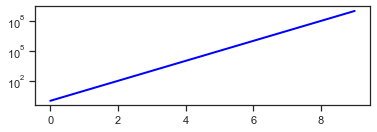

In [66]:
import pylab
import matplotlib.pyplot as plt
a = [pow(10, i) for i in range(10)]
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(a, color='blue', lw=2)

ax.set_yscale('log')

pylab.show()

In [23]:
tips = sns.load_dataset("tips")
tips
#sns.catplot(x="day",y="total_bill",data=tips);

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
# Regex used to match relevant loglines (in this case, a specific IP address)
line_regex = re.compile(r".*fwd=\"12.34.56.78\".*$")

In [4]:
# Output file, where the matched loglines will be copied to
output_filename = os.path.normpath("ak.log")
# Overwrites the file, ensure we're starting out with a blank file
with open(output_filename, "w") as out_file:
    out_file.write("")

In [ ]:
# Open output file in 'append' mode
with open(output_filename, "a") as out_file:
    # Open input file in 'read' mode
    with open("test_log.log", "r") as in_file:
        # Loop over each log line
        for line in in_file:
            # If log line matches our regex, print to console, and output file
            if (line_regex.search(line)):
                print line
                out_file.write(line)

In [19]:
a = ak.ones(500000)

In [20]:
#print(a.name)
print(ak.info(a))

name:"id_1" dtype:"float64" size:500000 ndim:1 shape:(500000) itemsize:8



Read Log File

In [17]:
infile = '../ak.log"

SyntaxError: EOL while scanning string literal (<ipython-input-17-62b1ab167d08>, line 1)

In [ ]:
print(infile)

In [ ]:

important = []
keep_phrases = ["test",
              "important",
              "keep me"]

with open(infile) as f:
    f = f.readlines()

for line in f:
    for phrase in keep_phrases:
        if phrase in line:
            important.append(line)
            break

print(important)

In [ ]:
from glob import glob
import os
allfiles=glob(os.path.join(netflow, '*/*abc*.df'))
Columns = ['srcIP','dstIP',...]
len(allfiles)

In [ ]:
data = ak.read_all(allfiles, datasets=columns)

In [ ]:
nrecords=data['srcIP'].size
print(f"{nrecords/10**9})